# Creation of a Linear Regression model

**Supervised learning can be used to solve two types of problems: regressions and classifications. In this notebook I show how to develop a Linear Regression model, which is the simplest model in machine learning.**

### 1. Dataset import and modeling

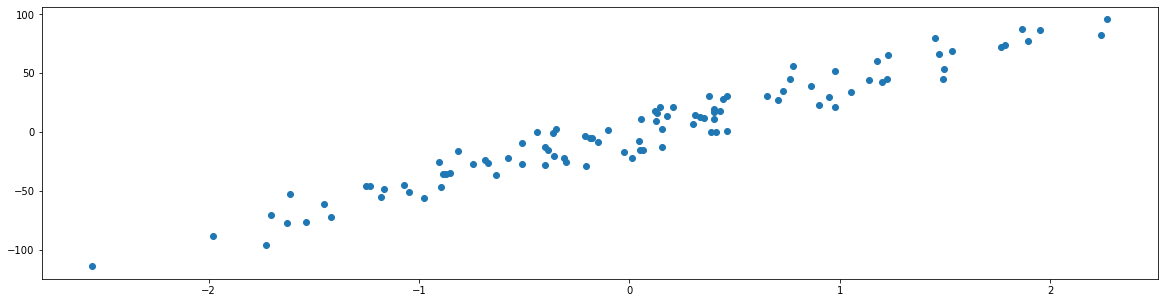

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

np.random.seed(0)

# create our dataset
x, y = make_regression(n_samples = 100, n_features=1,  noise = 10)   # n_example, n_variables(x), standard deviation between points
plt.figure(figsize = [20,5])
plt.scatter(x,y);

In [2]:
y = y.reshape(y.shape[0],1)
x.shape, y.shape

((100, 1), (100, 1))

### Explanations

Here we add a column of 1s in the matrix of X because we will need to multiply the matrix X with the vector Theta later. Theta vector is `(2x1)` while the matrix is now `(mx2)`

                                                  X * ɣ(Theta) = (mx2) x (2x1)

In [3]:
X = np.hstack((x,np.ones(x.shape)))  # Add a column of 1

### Explanations

To avoid having to calculate X times this calculation (`m(total variables) * f(x(i)) = ax(i) + b`), we use the matrices to group all these values in the same package in order to be able to do a single calculation on this matrix to evaluate all the predictions at once

For the moment, we do not know the value of the parameters a and b, so it is impossible to draw a good straight line on the point cloud, unless we choose parameters at random. It will be the role of the machine to learn these values by minimizing the cost function.

In [4]:
tetha = np.random.randn(2,1)   
tetha

array([[-0.63743703],
       [-0.39727181]])

### 2. Model implementation

It is he who makes the predictions f(x). At the beginning, the model parameters are always chosen at random.

                                            F -> x * ɣ (matrix mx2 * matrix 2x1)

In [5]:
def model(dataset,M_ab):
    return np.dot(dataset, M_ab)   

In [6]:
model(X,tetha).shape  

(100, 1)

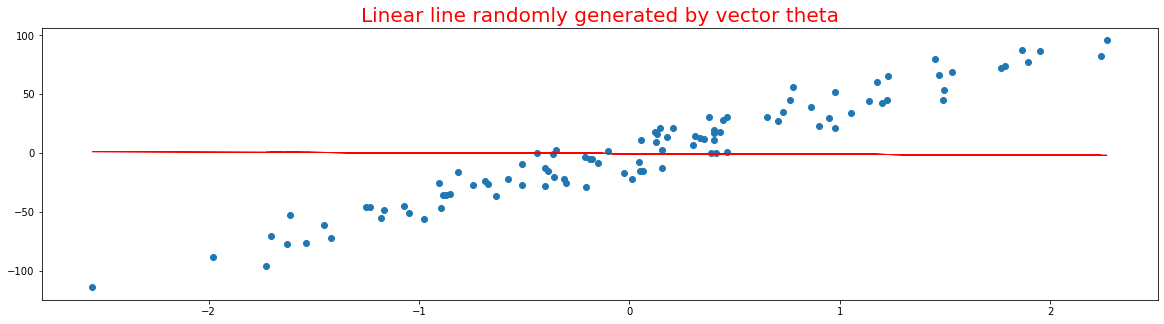

In [15]:
plt.figure(figsize = [20,5])
plt.scatter(x,y)
plt.title('Linear line randomly generated by vector theta', size = 20, color = 'Red')
plt.plot(x, model(X,tetha), c = 'red', lw = 1);

### 3. Cost Function

the cost function allows us to evaluate the performance of our model assuming the errors between f(x^{(i)}) and y^{(i)}. The question we ask ourselves is: How to measure these errors? I reveal it to you with the following analogy.

Imagine visiting a €200,000 apartment. Your machine learning model predicts that this apartment is worth $300,000. You can conclude that your model is therefore making an error of 300000 – 200000 = 100000 €.

Thus, we could say that to measure our errors, we must calculate the difference f(x) - y. However, if your prediction f(x) is less than y, then that error is negative, which is impractical (nobody says, "I made a negative $100,000 error")

So, to measure the errors between the predictions f(x) and the y values of the Dataset, we calculate the square of the difference: (f(x) - y)^2. This is by the way what is called the Euclidean norm, which represents the direct distance between f(x) and y in Euclidean geometry (the geometry we use on a daily basis)

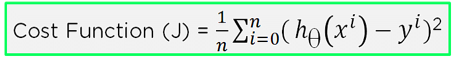



**Conclusion :** The Cost Function evaluates model performance by calculating errors between model predictions f(x) and expected y values ​​in the dataset.

For the Linear regression model, the cost function will be the minimum of the Root Mean Squared Error of the model, obtained by subtracting the predicted values from actual values. The cost function will be the minimum of these error values.


In [8]:
def cost_function(X,tetha,y) : 
    m = len(x)
    return 1 / (2*m) * np.sum((model(X,tetha)-y)**2)

cost_function(X,tetha,y)   # The sum of all the errors is equal to it (it must tend to 0) # Average error

1009.8259477174702

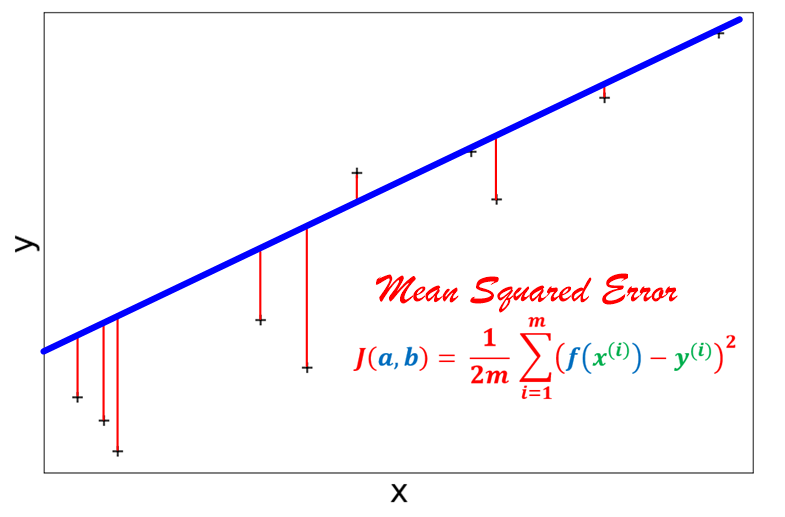

### 4.  Gradient Function

In [9]:
def gradient(X,tetha,y):
    m = len(x)
    intern = (model(X,tetha)) - y
    return 1 / m * np.dot(X.T, intern)

gradient(X,tetha,y)

array([[-44.07127248],
       [ -2.17019738]])

### 5. Gradient Descent Function
The Gradient Descent algorithm is probably one of the most important algorithms in all of Machine Learning and all of Deep Learning. Here's why:

The Gradient Descent algorithm (gradient descent) is an optimization algorithm that allows to converge to the minimum of any Convex function. In Machine Learning, we will use this algorithm in supervised learning problems to minimize the cost function associated with the model and the Dataset. This Cost function is precisely intended to be a Convex function!

To understand how it works, the analogy of the mountain helps a lot: You can find the lowest point of a valley by following the direction of the slope that descends the most. Thus the algorithm calculates the gradient of the Cost function (ie the slope of the valley) to gradually move towards its minimum.
With this mechanism, it is possible to find the best parameters of our model, that is to say the parameters which return the smallest errors.
In Gradient Descent, there is what is called the Learning Rate, which is no more and no less than the speed of convergence of the gradient descent towards the minimum of the cost function. You have to be vigilant about the choice of the Learning Rate: If it is too high, you risk always turning around the minimum without ever reaching it, and if it is too small, you risk taking an infinite time before it is reached. 'reach.

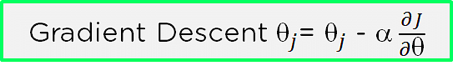

   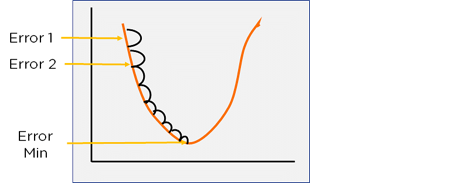 

In [10]:
def descent_G(X, tetha ,y , hyperparam, n_iteration):
    
    iteration = np.zeros(n_iteration)                # array with n_iteration of 0
    
    for i in range (0, n_iteration):
        tetha = tetha - ( hyperparam * gradient(X,tetha,y))   # update theta value until you find the optimal parameters
        iteration[i] = cost_function(X,tetha,y)              # Up to n iteration, it determines the evolution of the cost function on each 0
    
    return tetha, iteration

# descent_G(X,tetha,y,0.05,1000)

### 6. Model Training

In [11]:
tetha_final, iteration = descent_G(X, tetha, y, hyperparam=0.01, n_iteration=1500)
tetha_final

array([[42.61941659],
       [-0.81417066]])

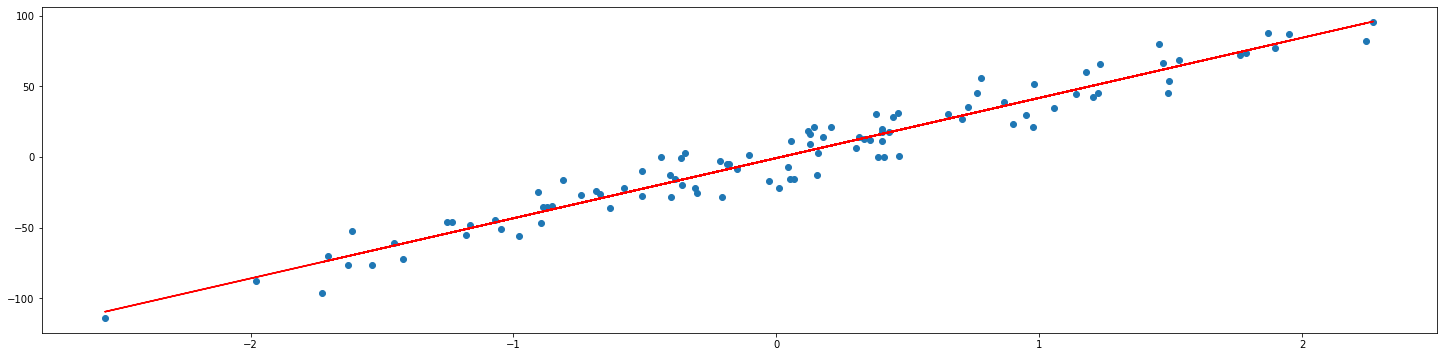

In [12]:
predict = model(X,tetha_final)
plt.figure(figsize = (25,6))
plt.scatter(x,y)
plt.plot(x,predict, c = 'red');

### The iteration variable
Thanks to the `iteration` variable we can see the evolution of the Cost Function and the way it has decreased over time.

`y` -> Represents the sum of all errors


`x` -> The number of iterations we have chosen

**Conclusion**: We can see that the Cost Function hasn't evolved (diminished) much at around 250-300 iterations. This therefore helps us to be able to reduce the number of iterations

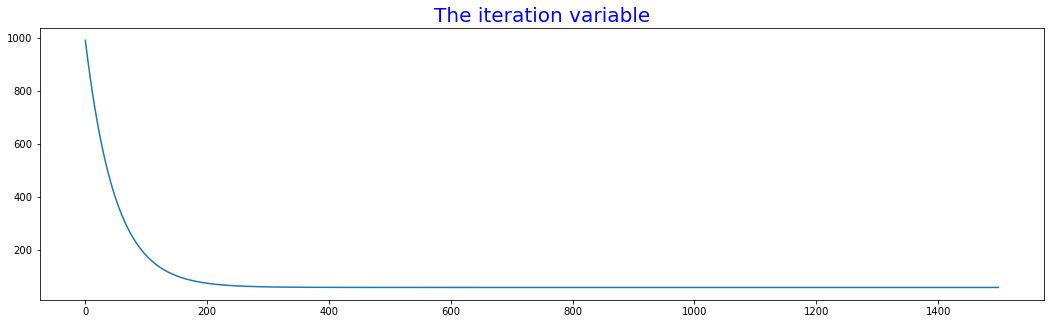

In [17]:
plt.figure(figsize = (18,5))
plt.title('The iteration variable', color = 'Blue', size = 20)
plt.plot(range(1500),iteration);   

## Creation of the R2 coefficient

We create a coefficient of determination using the R2 function (even if it already exists all ready) to know or show how well our model fits into the point cloud.

 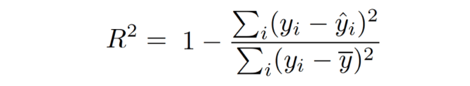

In [13]:
def coef(y, predict):
    u = np.sum((y - predict)**2)       # difference between our true values and the predicted values
    v = np.sum((y - y.mean())**2)      # difference between the true values and their averages.
    return 1 - u/v

In [14]:
coef(y, predict)

0.9417294727709561